In [28]:
from roboticstoolbox import DHRobot, RevoluteDH, PrismaticDH, ctraj
from spatialmath import SE3
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [30]:
# Definir el robot SCARA utilizando parámetros DH
robot = DHRobot([
    RevoluteDH(d=0.2, a=0.5, alpha=0),  # Primer enlace rotacional con a=0.5
    RevoluteDH(d=0, a=0.5, alpha=0),    # Segundo enlace rotacional con a=0.5
    RevoluteDH(d=0, a=0, alpha=np.pi),  # Tercer enlace rotacional (efector final) apuntando hacia abajo
    PrismaticDH(theta=0, a=0, alpha=0, qlim=[0, 0.4])  # Enlace prismático con límites de 0 a 0.4 metros
], name='SCARA')

In [32]:
# Puntos de origen y destino en términos cartesianos
origen = SE3(0, -0.5, 0.2)
destino = SE3(1, 0.5, 0.2)

In [34]:
# Generar la trayectoria cartesiana
num_puntos = 100
trayectoria = ctraj(origen, destino, num_puntos)

In [40]:
# Inicializar lista para guardar configuraciones de juntas
configuraciones = []

# Calcular las configuraciones de juntas usando cinemática inversa
for T in trayectoria:
    q = robot.ikine_LM(T).q
    configuraciones.append(q)

# Convertir configuraciones a un ndarray
configuraciones = np.array(configuraciones)

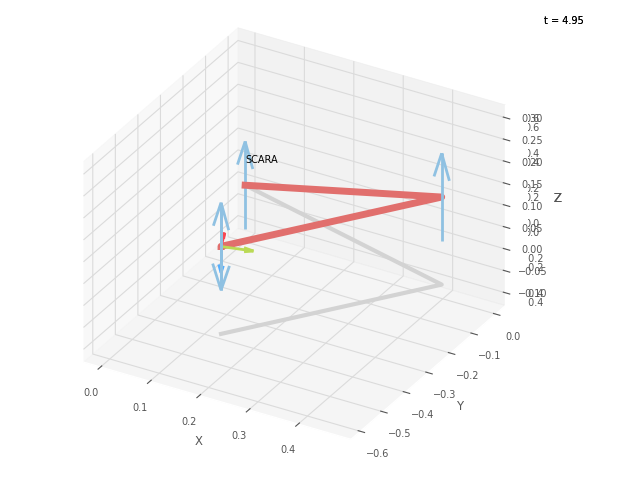

PyPlot3D backend, t = 4.99999999999999, scene:
  robot: Text(0.0, 0.0, 'SCARA')

In [41]:
# Plotear y guardar la animación como GIF
robot.plot(configuraciones, backend='pyplot', movie='scara_cartesian_motion.gif')